In [ ]:
import tensorflow

# importing Dependencies

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplolib qt

UsageError: Line magic function `%matplolib` not found.


# importing well file

In [2]:
file = 'F02-1_logs.las'

In [3]:
data = np.loadtxt(file,skiprows=35)
data[data==-999.2500]=np.nan

In [4]:
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_rel', 'PHIE']

# Converting to Pandas DataFrame

In [5]:
data = pd.DataFrame(data, columns=mneumonics)

# Engineering feature

In [6]:
data = data[['DEPTH', 'RHOB', 'DT', 'GR']]
tb=  [0,464,539,612,635,687,702, 795, 814, 926, 949, 1026, 1053, 1095, 1133, 1270,1297, 1430,2000]
f = [1,2,3,1,3,4,3,1,3,1,3,1,3,1,3,4,3,1] #FACIES NO
depth = data.DEPTH.values

In [7]:
facies=[]
for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i] > tb[j] and depth[i] <=tb[j+1]:
            facies.append(f[j])
data['FACIES'] = facies

In [11]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
DEPTH     9680 non-null float64
RHOB      8253 non-null float64
DT        9680 non-null float64
GR        9666 non-null float64
FACIES    9680 non-null int64
dtypes: float64(4), int64(1)
memory usage: 378.2 KB


,DEPTH,RHOB,DT,GR,FACIES
count,9680.000000,8253.000000,9680.000000,9666.000000,9680.000000
mean,773.925016,1975.091074,495.026839,46.613531,2.129132
std,419.177962,294.677828,50.861145,23.484662,1.009234
min,48.000000,1350.444700,368.114700,1.339200,1.000000
25%,410.962500,1812.400000,460.693600,23.527000,1.000000
50%,773.925000,2096.345000,505.393400,48.765250,3.000000
75%,1136.887575,2210.906000,521.642300,63.162950,3.000000
max,1499.850100,2346.629200,667.920800,129.177300,4.000000


## Data Visualisation

C:\Users\cool j\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\cool j\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


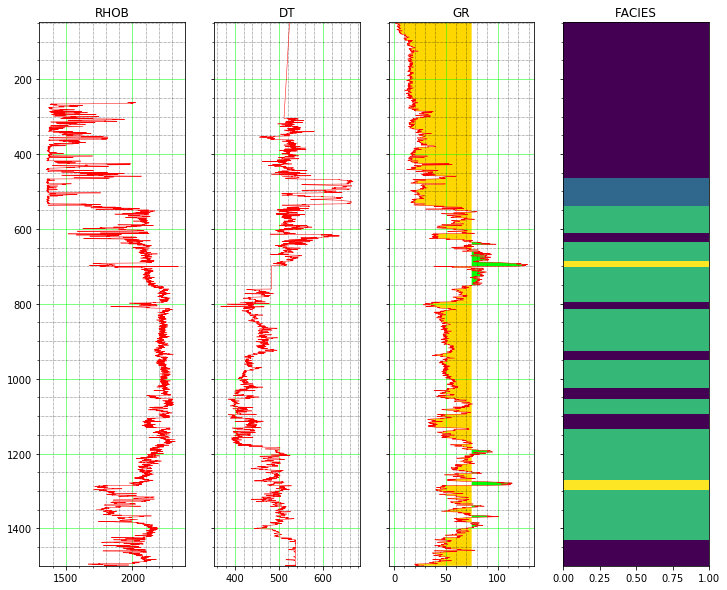

In [12]:
data = data.values
mneumonics = [ 'RHOB', 'DT', 'GR', 'FACIES' ]
rows,cols = 1,4
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1], data[:,0], linewidth = '0.5', color='r')
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].set_title('%s' % mneumonics[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    elif i==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mneumonics[i])
y2 = data[:,3]  #GR
y1 = y2*0+75 #75 API is Sand-Shale Boundary Line
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1>=y2), color = 'gold', linewidth=0)
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1<y2), color = 'lime', linewidth=0)
#plt.show()

# well data

In [ ]:
import pandas as pd

In [17]:
well = pd.read_csv('well1.csv')

In [20]:
well.columns

Index(['DEPTH', 'RHOB', 'DT', 'GR', 'FACIES'], dtype='object')

In [21]:
well.head()

,DEPTH,RHOB,DT,GR,FACIES
0,48.00,NaN,524.0485,NaN,1
1,48.15,NaN,524.0410,NaN,1
2,48.30,NaN,524.0336,NaN,1
3,48.45,NaN,524.0262,NaN,1
4,48.60,NaN,524.0190,NaN,1


In [25]:
well['RHOB'].max()

2346.6292

In [55]:
DEPTH, GR, DT, RHOB = well['DEPTH'], well['GR'], well['DT'], well['RHOB']

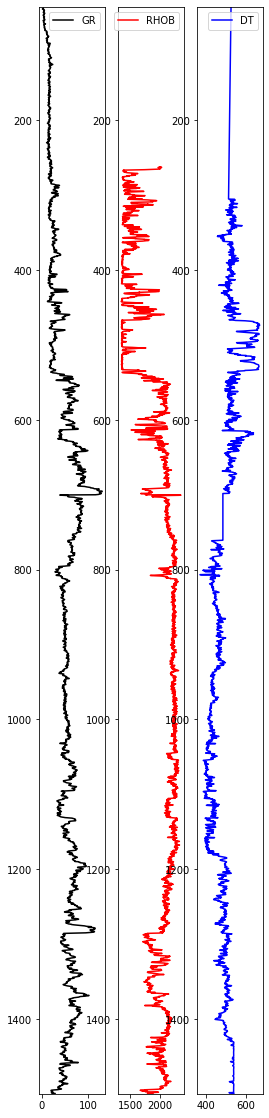

In [56]:
plt.figure(figsize = (4, 20))

plt.subplot(1, 3, 1)
plt.plot(GR, DEPTH, 'k', label='GR')
plt.ylim(max(DEPTH),min(DEPTH))
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(RHOB, DEPTH, 'r', label='RHOB')
plt.ylim(max(DEPTH),min(DEPTH))
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(DT, DEPTH, 'b', label='DT')
plt.ylim(max(DEPTH),min(DEPTH))
plt.legend()